In [10]:
from __future__ import division #makes floats from integer division (1/2 = 0.5 instead of 0)
import numpy as np #everyone's favorite package
import matplotlib.pyplot as plt #plotting
from matplotlib import rcParams #fancy plot fonts
from matplotlib.ticker import NullFormatter #no tickmarks for histogram on axis
import pandas as pd #dataframe fun, don't actually need for the code below


#make fonts look fancier
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
plt.rc('text', usetex='true')

#adjust font sizes for everthing
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18
rcParams['font.size'] = 18

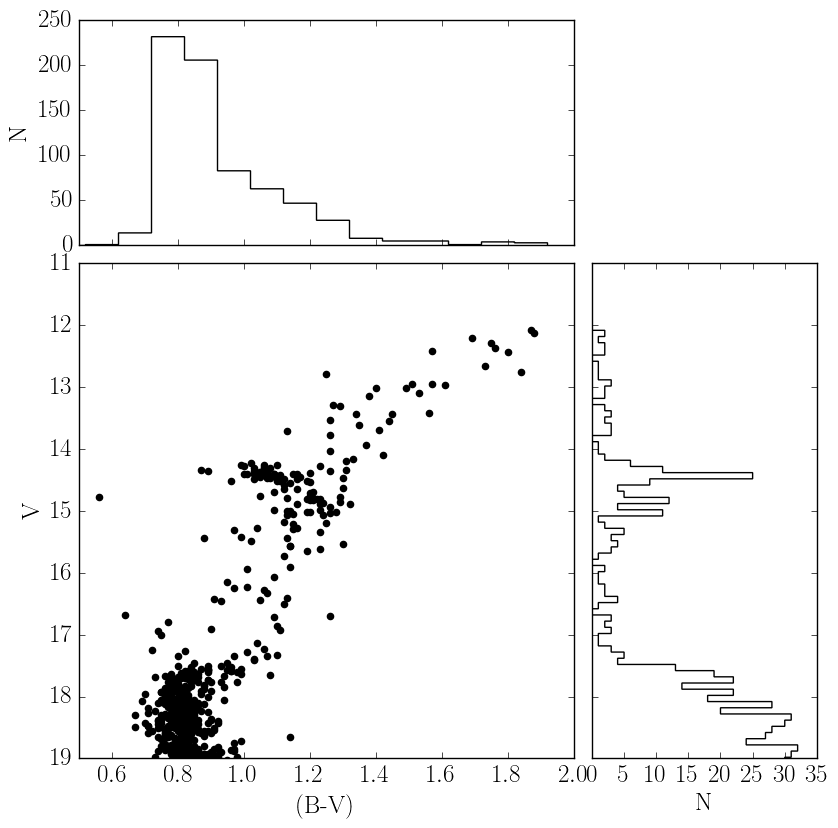

In [11]:
#import some photometry
Vphot, BVphot, prob = np.loadtxt('m71_allwpm_namefiller.txt', skiprows=1, usecols=(6,7,8), unpack=True)

#limit to only stars with 85% change of being cluster members based on proper motion study
Vphot = Vphot[np.where(prob >= 85)]
BVphot = BVphot[np.where(prob >= 85)]

#set sizes of plotting windows (scatter in center, hists on axis)
left, width = 0.12, 0.55
bottom, height = 0.12, 0.55
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

#set figure size as 9 in x 9 in
fig = plt.figure(1, figsize = (9,9))

#set fonts
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#define each plotting window
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

#no numbers on the shared axis of either histogram
nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

#set x, y limits; labels of scatter plot
axScatter.set_ylim(19,11)
axScatter.set_xlim(0.5,2.0)
axScatter.set_xlabel('(B-V)')
axScatter.set_ylabel('V')

#make CMD scatter plot
axScatter.scatter(BVphot, Vphot, color='black')

#set x limits of histograms
axHisty.set_ylim(19,11)
axHistx.set_xlim(0.5,2.0)

#plot histograms with bin sizes of 0.1 mags
axHistx.hist(BVphot, bins=np.arange(min(BVphot), max(BVphot) + 0.1, 0.1), histtype='step', color='black')
axHistx.set_ylabel('N')
axHisty.hist(Vphot, bins =np.arange(min(Vphot), max(Vphot) + 0.1, 0.1), histtype='step', orientation='horizontal', color='black')
axHisty.set_xlabel('N')
plt.savefig("cmd-histograms.pdf")
plt.show()
plt.close()

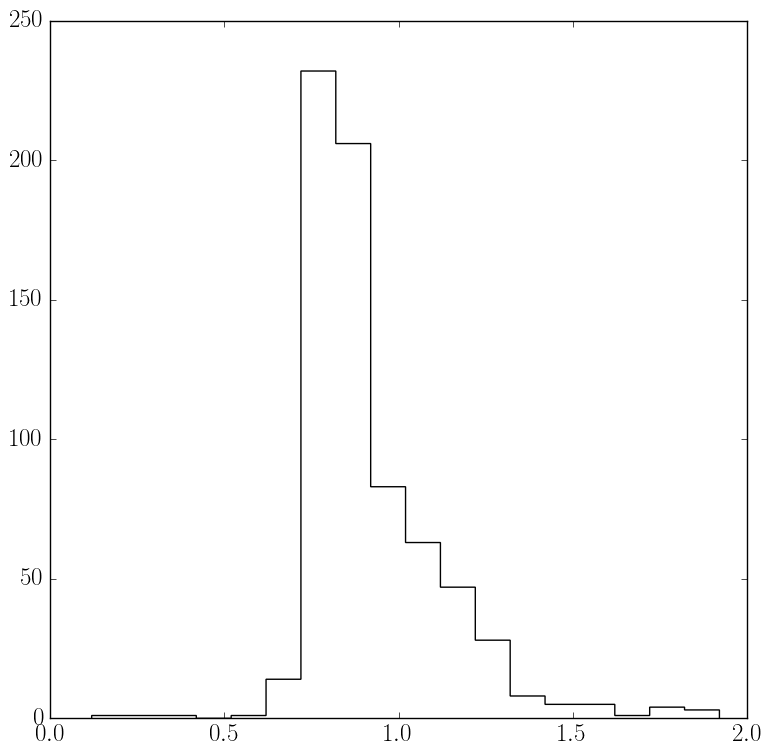

In [13]:
#below just makes a simple histogram of B-V color as an example
binwidth = 0.1
fig = plt.figure(figsize = (9,9))
plt.hist(BVphot, bins=np.arange(min(BVphot), max(BVphot) + binwidth, binwidth), histtype='step', color='black')
plt.savefig("bv-histograms.pdf")
plt.show()
plt.close()